In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import folium

In [2]:
data = pd.read_csv('Data/돌봄교실과 출산율 관계 분석/우리동네키움센터 .csv', encoding='cp949')

In [3]:
data.head(5)

,시설ID,시설명,서비스분류코드,서비스분류명,자치구코드,자치구명,연령구분코드,연령구분,X좌표값,Y좌표값,...,월사용료,일사용료무료여부,일자기부담금,일사용료,상시돌봄정원수,일시돌봄정원수,전용면적(m2),자치구코드배열,등록일시,수정일시
0,GN220302,강남7호점 우리동네키움센터(누리봄다함께키움센터),1009,융합형키움센터,11680,강남구,1003,초등학생,127.074160,37.491090,...,50000.0,N,NaN,2500.0,40,8,685.79,NaN,2022-03-08 18:41:19.0,2022-03-24 19:53:29.0
1,GN220301,강남6호점 우리동네키움센터(논현다함께키움센터),1001,우리동네키움센터,11680,강남구,1003,초등학생,127.041800,37.511580,...,50000.0,N,NaN,2500.0,20,4,154.42,NaN,2022-03-07 11:45:44.0,2022-03-14 13:30:06.0
2,DJ220201,동작12호점 우리동네키움센터(상도2동),1001,우리동네키움센터,11590,동작구,1003,초등학생,126.945671,37.501266,...,50000.0,N,NaN,2500.0,20,4,82.88,NaN,2022-02-25 13:18:41.0,2022-03-16 11:48:37.0
3,SM220201,서대문구 7호점 우리동네키움센터,1001,우리동네키움센터,11410,서대문구,1003,초등학생,126.919400,37.574110,...,50000.0,N,NaN,2500.0,23,5,138.94,NaN,2022-02-21 16:30:49.0,2022-03-02 13:44:26.0
4,GB220201,강북5호점 우리동네키움센터(송중동),1001,우리동네키움센터,11305,강북구,1003,초등학생,127.030240,37.623020,...,50000.0,N,NaN,2500.0,20,4,161,NaN,2022-02-07 08:53:35.0,2022-03-02 08:48:24.0


In [4]:
data['자치구명'].value_counts()

노원구     28
구로구     17
송파구     16
동작구     13
영등포구    12
성동구     11
성북구     10
광진구     10
은평구      9
강남구      7
중구       7
용산구      7
마포구      7
서대문구     7
종로구      6
서초구      6
강동구      6
도봉구      6
동대문구     4
강서구      4
중랑구      3
강북구      3
양천구      3
금천구      3
관악구      2
Name: 자치구명, dtype: int64

In [5]:
center = {}
for i in range(len(data['자치구명'].unique())) :
    index = str(data['자치구명'].value_counts().index[i])
    value = int(data['자치구명'].value_counts()[i])
    
    center[index] = value

In [6]:
type(center['강서구'])

int

In [7]:
data1 = pd.read_csv('Data/돌봄교실과 출산율 관계 분석/지역아동센터 시설현황정보 .csv', encoding='cp949')

In [8]:
data1

,시설ID,시설명,서비스분류코드,서비스분류,자치구코드,자치구명,연령구분코드,연령구분,X좌표값,Y좌표값,...,사용료,학기시작시간,학기종료시간,방학시작시간,방학종료시간,토요일운영여부,토요일운영시작시간,토요일운영종료시간,등록일시,수정일시
0,JN220301,친구네지역아동센터,1003,지역아동센터,11110,종로구,1003,초등학생,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,2022-03-05 16:55:00.0,NaN
1,KC220201,함사람지역아동센터,1003,지역아동센터,11545,금천구,1003,초등학생,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,2022-02-04 16:55:00.0,NaN
2,GB220104,돌산공부방지역아동센터,1003,지역아동센터,11305,강북구,1003,초등학생,127.022670,37.618850,...,0.0,1300.0,2130.0,NaN,NaN,N,NaN,NaN,2022-01-18 16:55:00.0,2022-02-28 16:05:34.0
3,DJ220103,상도푸른지역아동센터,1003,지역아동센터,11590,동작구,1003,초등학생,126.945710,37.498310,...,0.0,1100.0,2100.0,NaN,NaN,N,NaN,NaN,2022-01-13 16:55:00.0,2022-02-28 16:07:49.0
4,SC220101,서초지역아동센터,1003,지역아동센터,11650,서초구,1003,초등학생,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,2022-01-12 17:09:36.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,GR200132,금강지역아동센터,1003,지역아동센터,11530,구로구,1003,초등학생,126.855620,37.500780,...,0.0,1000.0,1900.0,NaN,NaN,N,NaN,NaN,2020-01-27 01:30:30.0,2020-03-09 14:06:19.0
431,GR200129,하모니지역아동센터,1003,지역아동센터,11530,구로구,1003,초등학생,126.854320,37.488720,...,0.0,1000.0,1900.0,NaN,NaN,Y,1000.0,1900.0,2020-01-27 01:30:29.0,2020-03-10 10:41:37.0
432,GN191007,LH 행복꿈터 열린마음 지역아동센터,1003,지역아동센터,11680,강남구,1003,초등학생,127.091359,37.470747,...,0.0,1000.0,1900.0,1000.0,1900.0,N,NaN,NaN,2019-11-21 19:33:22.0,2020-03-13 11:17:04.0
433,GN191005,이웃사랑 일원지역아동센터,1003,지역아동센터,11680,강남구,1003,초등학생,127.082400,37.494360,...,0.0,1100.0,2200.0,1100.0,2200.0,N,NaN,NaN,2019-11-21 19:33:22.0,2020-02-18 13:28:25.0


In [9]:
child_center = {}
for i in range(len(data1['자치구명'].unique())) :
    index = str(data1['자치구명'].value_counts().index[i])
    value = int(data1['자치구명'].value_counts()[i])
    
    child_center[index] = value

In [10]:
child_center

{'성북구': 27,
 '관악구': 27,
 '은평구': 27,
 '금천구': 27,
 '노원구': 24,
 '양천구': 24,
 '구로구': 24,
 '중랑구': 23,
 '강동구': 23,
 '동작구': 22,
 '강북구': 21,
 '강서구': 20,
 '송파구': 19,
 '영등포구': 17,
 '도봉구': 17,
 '동대문구': 14,
 '광진구': 13,
 '종로구': 12,
 '성동구': 12,
 '서초구': 11,
 '마포구': 11,
 '서대문구': 7,
 '용산구': 5,
 '강남구': 4,
 '중구': 4}

In [11]:
child_center_count = []
center_count = []
keys = []

for key in child_center.keys() :
    keys.append(key)
    center_count.append(center[key])
    child_center_count.append(child_center[key])

In [12]:
keys

['성북구',
 '관악구',
 '은평구',
 '금천구',
 '노원구',
 '양천구',
 '구로구',
 '중랑구',
 '강동구',
 '동작구',
 '강북구',
 '강서구',
 '송파구',
 '영등포구',
 '도봉구',
 '동대문구',
 '광진구',
 '종로구',
 '성동구',
 '서초구',
 '마포구',
 '서대문구',
 '용산구',
 '강남구',
 '중구']

In [13]:
type(center_count[0])

int

In [14]:
type(child_center_count[0])

int

In [15]:
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.0*h, '%d'%int(h),
                ha='center', va='bottom')

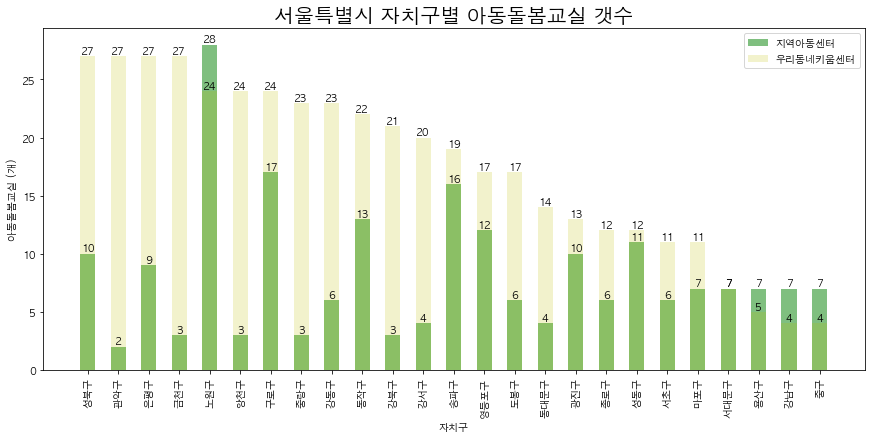

In [16]:
plt.rc('font', family='AppleGothic')
fig, ax = plt.subplots(figsize=(12,6))
size = np.arange(len(child_center_count))

file_name = '서울특별시 자치구별 아동돌봄교실 갯수'
rect1 = plt.bar(size, center_count, width=0.5, color='g', label='지역아동센터', alpha=0.5)
autolabel(rect1)
plt.title(file_name, fontsize=20)

rect2 = plt.bar(size, child_center_count, width=0.5, color='y', label='우리동네키움센터', alpha=0.2)
autolabel(rect2)
plt.legend()
plt.xticks(size, keys, rotation = 90)
plt.tight_layout()
plt.xlabel('자치구')
plt.ylabel('아동돌봄교실 (개)')
plt.savefig(file_name + '.png')
plt.show()

In [17]:
# 누적 갯수로 컬러맵 만들어보기~

In [18]:
center_sum = {}

for i in range(len(center_count)) :
    center_sum[keys[i]] = center_count[i] + child_center_count[i]

In [19]:
center_sum

{'성북구': 37,
 '관악구': 29,
 '은평구': 36,
 '금천구': 30,
 '노원구': 52,
 '양천구': 27,
 '구로구': 41,
 '중랑구': 26,
 '강동구': 29,
 '동작구': 35,
 '강북구': 24,
 '강서구': 24,
 '송파구': 35,
 '영등포구': 29,
 '도봉구': 23,
 '동대문구': 18,
 '광진구': 23,
 '종로구': 18,
 '성동구': 23,
 '서초구': 17,
 '마포구': 18,
 '서대문구': 14,
 '용산구': 12,
 '강남구': 11,
 '중구': 11}

In [20]:
data = pd.read_csv('Data/출산장려금과 출산율 관계분석/2020서울특별시_합계출산율.csv', encoding='cp949')
data = data.drop(0)
data = data.loc[:, ['시군구별', '합계출산율']]
data.columns = ['자치구', '합계출산율']
data

,자치구,합계출산율
1,종로구,0.522
2,중구,0.688
3,용산구,0.634
4,성동구,0.783
5,광진구,0.527
6,동대문구,0.699
7,중랑구,0.660
8,성북구,0.676
9,강북구,0.550
10,도봉구,0.601


In [21]:
birth = {}
for i in range(25) :
    gu = data['자치구'][i+1]
    birth[gu] = data['합계출산율'][i+1]

In [22]:
birth_value = {}

for key in center_sum.keys() :
    birth_value[key] = birth[key]
birth_value

{'성북구': 0.676,
 '관악구': 0.474,
 '은평구': 0.623,
 '금천구': 0.668,
 '노원구': 0.695,
 '양천구': 0.644,
 '구로구': 0.737,
 '중랑구': 0.66,
 '강동구': 0.748,
 '동작구': 0.655,
 '강북구': 0.55,
 '강서구': 0.675,
 '송파구': 0.665,
 '영등포구': 0.705,
 '도봉구': 0.601,
 '동대문구': 0.699,
 '광진구': 0.527,
 '종로구': 0.522,
 '성동구': 0.783,
 '서초구': 0.656,
 '마포구': 0.594,
 '서대문구': 0.685,
 '용산구': 0.634,
 '강남구': 0.537,
 '중구': 0.688}

In [23]:
# len(birth_value)
len(center_sum)

25

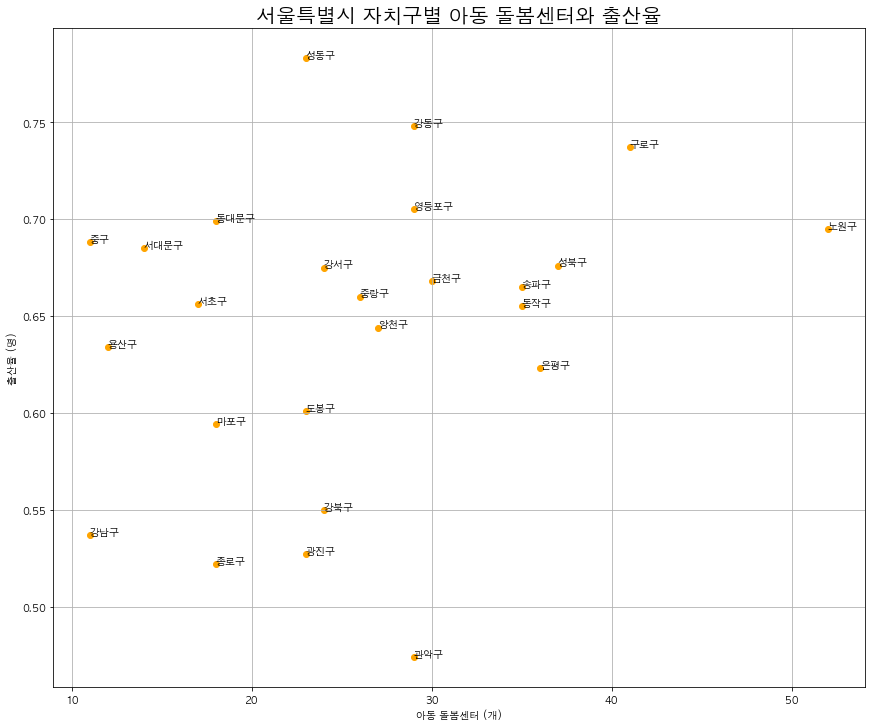

In [24]:
y = list(birth_value.values())
x = list(center_sum.values())
fig, ax = plt.subplots(figsize=(12,10))

file_name = '서울특별시 자치구별 아동 돌봄센터와 출산율'
plt.title(file_name, fontsize=20)


plt.scatter(x, y, color='orange')

for i, label in enumerate(keys):
    plt.text(x[i], y[i], label)

plt.grid()
plt.tight_layout()
plt.ylabel('출산율 (명)')
plt.xlabel('아동 돌봄센터 (개)')
plt.savefig(file_name + '.png')
plt.show()

In [25]:
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

In [26]:
seoul_geo

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.11879551821994, 37.557222485451305],
      [127.12146867175024, 37.55986003393365],
      [127.12435254630417, 37.56144246249796],
      [127.13593925898998, 37.56564793048277],
      [127.14930548011061, 37.56892250303897],
      [127.15511020940411, 37.57093642128295],
      [127.16683184366129, 37.57672487388627],
      [127.17038810813094, 37.576465605301046],
      [127.17607118428914, 37.57678573961056],
      [127.17905504160184, 37.57791388161732],
      [127.17747787800164, 37.57448983055031],
      [127.1781775408844, 37.571481967974336],
      [127.17995281860672, 37.569309661290504],
      [127.18122821955262, 37.56636089217979],
      [127.18169407550688, 37.56286338914073],
      [127.18408792

In [27]:
m = folium.Map(
    location = [37.559819, 126.963895],
    zoom_start = 11,
    tiles = 'cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name = '지역구'
).add_to(m)

m

In [28]:
center_sum = pd.DataFrame(list(center_sum.items()), columns=['자치구', '아동돌봄센터'])
center_sum

,자치구,아동돌봄센터
0,성북구,37
1,관악구,29
2,은평구,36
3,금천구,30
4,노원구,52
5,양천구,27
6,구로구,41
7,중랑구,26
8,강동구,29
9,동작구,35


In [30]:
m.choropleth(geo_data=seoul_geo,
            data = center_sum,
            columns=('자치구', '아동돌봄센터'),
            key_on='properties.name',
            fill_color='YlOrRd',
            legend_name="자치구별 아동돌봄센터 갯수",
            fill_opacity=0.5,
            line_opacity=0.2)
m

m.save('자치구별 아동돌봄센터 갯수.html')